# London Weather Dataset LSTM

In [139]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

## Importing the dataset

In [140]:
!cp "/content/drive/MyDrive/Colab Notebooks/London/london_weather.csv" "/content/londonweather.csv"

In [141]:
df = pd.read_csv('/content/londonweather.csv')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [142]:
df.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [143]:
df.index = pd.to_datetime(df['date'], format='%Y%m%d')
df[:25]

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
1979-01-06,19790106,5.0,3.8,39.0,8.3,-0.5,-6.6,0.7,102780.0,1.0
1979-01-07,19790107,8.0,0.0,13.0,8.5,1.5,-5.3,5.2,102520.0,0.0
1979-01-08,19790108,8.0,0.1,15.0,5.8,6.9,5.3,0.8,101870.0,0.0
1979-01-09,19790109,4.0,5.8,50.0,5.2,3.7,1.6,7.2,101170.0,0.0


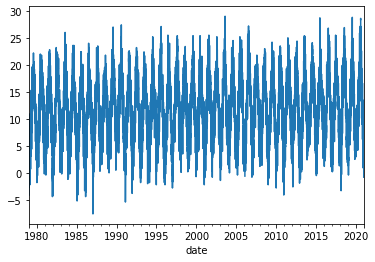

In [144]:
temp = df['mean_temp']
temp.plot()

In [145]:
#df[' _tempm'].fillna(df[' _tempm'].mean(), inplace = True)
df['mean_temp'] = df['mean_temp'].interpolate()

In [146]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [147]:
WINDOW_SIZE = 30
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((15311, 30, 1), (15311,))

## Splitting the dataset

In [148]:
X_train1, y_train1 = X1[:12248], y1[:12248]
X_val1, y_val1 = X1[12248:13780], y1[12248:13780]
X_test1, y_test1 = X1[13780:], y1[13780:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((12248, 30, 1), (12248,), (1532, 30, 1), (1532,), (1531, 30, 1), (1531,))

## Building the network

In [149]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((30, 1)))
model1.add(LSTM(64, return_sequences=True))
model1.add(LSTM(64))
model1.add(Dense(32, 'relu'))
model1.add(Dense(16, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 30, 64)            16896     
                                                                 
 lstm_8 (LSTM)               (None, 64)                33024     
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 52,545
Trainable params: 52,545
Non-trainable params: 0
_________________________________________________________________


In [150]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

## Training

In [151]:
history1 = model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=30, callbacks=[cp1])

Epoch 1/30
383/383 [==============================] - ETA: 0s - loss: 79.1629 - root_mean_squared_error: 8.8974

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


383/383 [==============================] - 28s 60ms/step - loss: 79.1629 - root_mean_squared_error: 8.8974 - val_loss: 23.6273 - val_root_mean_squared_error: 4.8608
Epoch 2/30
382/383 [============================>.] - ETA: 0s - loss: 10.8021 - root_mean_squared_error: 3.2867

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


383/383 [==============================] - 23s 59ms/step - loss: 10.7989 - root_mean_squared_error: 3.2862 - val_loss: 6.1798 - val_root_mean_squared_error: 2.4859
Epoch 3/30
383/383 [==============================] - ETA: 0s - loss: 5.5100 - root_mean_squared_error: 2.3473

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


383/383 [==============================] - 23s 59ms/step - loss: 5.5100 - root_mean_squared_error: 2.3473 - val_loss: 4.4230 - val_root_mean_squared_error: 2.1031
Epoch 4/30
382/383 [============================>.] - ETA: 0s - loss: 4.4010 - root_mean_squared_error: 2.0978

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


383/383 [==============================] - 23s 60ms/step - loss: 4.4028 - root_mean_squared_error: 2.0983 - val_loss: 3.7405 - val_root_mean_squared_error: 1.9340
Epoch 5/30
382/383 [============================>.] - ETA: 0s - loss: 3.9045 - root_mean_squared_error: 1.9760

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


383/383 [==============================] - 22s 58ms/step - loss: 3.9042 - root_mean_squared_error: 1.9759 - val_loss: 3.5675 - val_root_mean_squared_error: 1.8888
Epoch 6/30
383/383 [==============================] - ETA: 0s - loss: 3.7205 - root_mean_squared_error: 1.9288

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


383/383 [==============================] - 24s 63ms/step - loss: 3.7205 - root_mean_squared_error: 1.9288 - val_loss: 3.5072 - val_root_mean_squared_error: 1.8727
Epoch 7/30
382/383 [============================>.] - ETA: 0s - loss: 3.6706 - root_mean_squared_error: 1.9159

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


383/383 [==============================] - 23s 60ms/step - loss: 3.6689 - root_mean_squared_error: 1.9154 - val_loss: 3.4075 - val_root_mean_squared_error: 1.8459
Epoch 8/30
383/383 [==============================] - 14s 37ms/step - loss: 3.6037 - root_mean_squared_error: 1.8983 - val_loss: 3.4858 - val_root_mean_squared_error: 1.8670
Epoch 9/30
383/383 [==============================] - 14s 37ms/step - loss: 3.5689 - root_mean_squared_error: 1.8891 - val_loss: 3.4146 - val_root_mean_squared_error: 1.8479
Epoch 10/30
383/383 [==============================] - ETA: 0s - loss: 3.5525 - root_mean_squared_error: 1.8848

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


383/383 [==============================] - 23s 59ms/step - loss: 3.5525 - root_mean_squared_error: 1.8848 - val_loss: 3.3800 - val_root_mean_squared_error: 1.8385
Epoch 11/30
382/383 [============================>.] - ETA: 0s - loss: 3.5328 - root_mean_squared_error: 1.8796

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


383/383 [==============================] - 22s 57ms/step - loss: 3.5361 - root_mean_squared_error: 1.8804 - val_loss: 3.3680 - val_root_mean_squared_error: 1.8352
Epoch 12/30
383/383 [==============================] - 14s 36ms/step - loss: 3.5153 - root_mean_squared_error: 1.8749 - val_loss: 3.3692 - val_root_mean_squared_error: 1.8355
Epoch 13/30
383/383 [==============================] - ETA: 0s - loss: 3.5237 - root_mean_squared_error: 1.8772

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


383/383 [==============================] - 23s 60ms/step - loss: 3.5237 - root_mean_squared_error: 1.8772 - val_loss: 3.3478 - val_root_mean_squared_error: 1.8297
Epoch 14/30
383/383 [==============================] - 14s 37ms/step - loss: 3.5176 - root_mean_squared_error: 1.8755 - val_loss: 3.3618 - val_root_mean_squared_error: 1.8335
Epoch 15/30
383/383 [==============================] - 14s 37ms/step - loss: 3.4985 - root_mean_squared_error: 1.8704 - val_loss: 3.3885 - val_root_mean_squared_error: 1.8408
Epoch 16/30
383/383 [==============================] - 16s 42ms/step - loss: 3.4892 - root_mean_squared_error: 1.8679 - val_loss: 3.5784 - val_root_mean_squared_error: 1.8917
Epoch 17/30
383/383 [==============================] - ETA: 0s - loss: 3.4855 - root_mean_squared_error: 1.8670

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


383/383 [==============================] - 23s 60ms/step - loss: 3.4855 - root_mean_squared_error: 1.8670 - val_loss: 3.3427 - val_root_mean_squared_error: 1.8283
Epoch 18/30
383/383 [==============================] - 14s 37ms/step - loss: 3.4919 - root_mean_squared_error: 1.8687 - val_loss: 3.3899 - val_root_mean_squared_error: 1.8412
Epoch 19/30
383/383 [==============================] - 14s 37ms/step - loss: 3.4863 - root_mean_squared_error: 1.8672 - val_loss: 3.3465 - val_root_mean_squared_error: 1.8293
Epoch 20/30
383/383 [==============================] - 14s 37ms/step - loss: 3.4793 - root_mean_squared_error: 1.8653 - val_loss: 3.3605 - val_root_mean_squared_error: 1.8332
Epoch 21/30
383/383 [==============================] - 15s 38ms/step - loss: 3.4884 - root_mean_squared_error: 1.8677 - val_loss: 3.4196 - val_root_mean_squared_error: 1.8492
Epoch 22/30
383/383 [==============================] - 14s 38ms/step - loss: 3.4774 - root_mean_squared_error: 1.8648 - val_loss: 3.3835 

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


383/383 [==============================] - 22s 59ms/step - loss: 3.4734 - root_mean_squared_error: 1.8637 - val_loss: 3.3358 - val_root_mean_squared_error: 1.8264
Epoch 26/30
383/383 [==============================] - 14s 37ms/step - loss: 3.4651 - root_mean_squared_error: 1.8615 - val_loss: 3.4206 - val_root_mean_squared_error: 1.8495
Epoch 27/30
383/383 [==============================] - 16s 42ms/step - loss: 3.4662 - root_mean_squared_error: 1.8618 - val_loss: 3.3789 - val_root_mean_squared_error: 1.8382
Epoch 28/30
383/383 [==============================] - 14s 38ms/step - loss: 3.4812 - root_mean_squared_error: 1.8658 - val_loss: 3.3447 - val_root_mean_squared_error: 1.8288
Epoch 29/30
382/383 [============================>.] - ETA: 0s - loss: 3.4779 - root_mean_squared_error: 1.8649

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


383/383 [==============================] - 24s 62ms/step - loss: 3.4787 - root_mean_squared_error: 1.8651 - val_loss: 3.3198 - val_root_mean_squared_error: 1.8220
Epoch 30/30
383/383 [==============================] - 14s 37ms/step - loss: 3.4711 - root_mean_squared_error: 1.8631 - val_loss: 3.3414 - val_root_mean_squared_error: 1.8279


In [152]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

## Model results

In [153]:
train_predictions1 = model1.predict(X_train1).flatten()
train_results1 = pd.DataFrame(data={'Train Predictions':train_predictions1, 'Actuals':y_train1})
train_results1

,Train Predictions,Actuals
0,0.796313,2.1
1,2.877124,5.2
2,5.713327,2.8
3,2.539753,0.9
4,1.168031,1.6
...,...,...
12243,16.105022,19.2
12244,18.946821,19.8
12245,19.294588,20.9
12246,20.143282,19.4


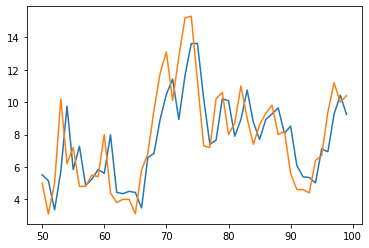

In [154]:
import matplotlib.pyplot as plt
plt.plot(train_results1['Train Predictions'][50:100])
plt.plot(train_results1['Actuals'][50:100])

In [155]:
val_predictions1 = model1.predict(X_val1).flatten()
val_results1 = pd.DataFrame(data={'Val Predictions':val_predictions1, 'Actuals':y_val1})
val_results1

,Val Predictions,Actuals
0,20.426785,19.2
1,18.773193,21.2
2,20.563469,20.5
3,19.930038,19.4
4,19.045050,23.2
...,...,...
1527,13.535840,11.8
1528,11.919637,11.2
1529,11.563693,11.6
1530,11.885152,10.4


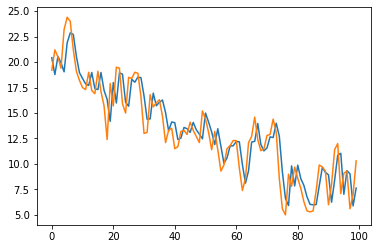

In [156]:
plt.plot(val_results1['Val Predictions'][:100])
plt.plot(val_results1['Actuals'][:100])

In [157]:
test_predictions1 = model1.predict(X_test1).flatten()
test_results1 = pd.DataFrame(data={'Test Predictions':test_predictions1, 'Actuals':y_test1})
test_results1

,Test Predictions,Actuals
0,10.277167,10.0
1,10.416512,11.4
2,11.534442,11.8
3,11.686866,13.0
4,12.741778,12.2
...,...,...
1526,6.081103,7.5
1527,7.877703,1.1
1528,1.428186,2.6
1529,3.905034,2.7


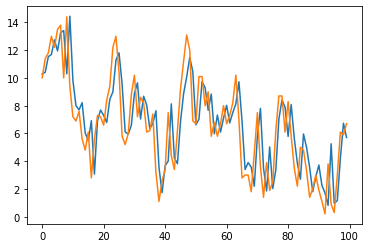

In [158]:
plt.plot(test_results1['Test Predictions'][:100])
plt.plot(test_results1['Actuals'][:100])

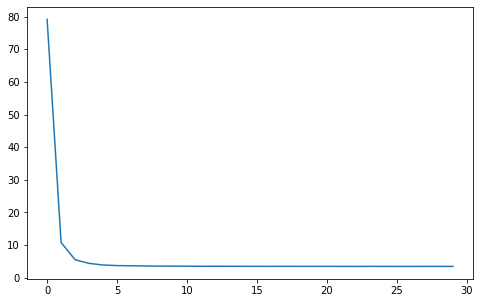

In [159]:
plt.figure(figsize=(8,5))
plt.plot(history1.history['loss'])

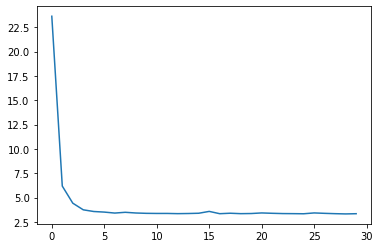

In [160]:
plt.plot(history1.history['val_loss'])

In [161]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(      Predictions  Actuals
 0       10.277167     10.0
 1       10.416512     11.4
 2       11.534442     11.8
 3       11.686866     13.0
 4       12.741778     12.2
 ...           ...      ...
 1526     6.081103      7.5
 1527     7.877703      1.1
 1528     1.428186      2.6
 1529     3.905034      2.7
 1530     3.164637     -0.8
 
 [1531 rows x 2 columns], 4.165681651378227)

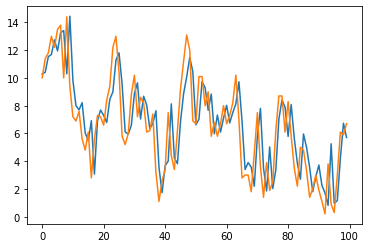

In [162]:
plot_predictions1(model1, X_test1, y_test1)